<a href="https://colab.research.google.com/github/evantango/Prevalence-Imputation/blob/main/Sleep_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Sleep Disturbance Prevalence from PSQI
Utilizing the PSQI distribution (mean and SD) to determine the prevalence of sleep disturbance (PSQI >5) 

1. Generate prevalence by integration for PSQI > 5
2. Calculate 95% CI of the prevalence estimate 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;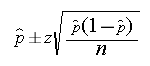


3. Generate mean of sleep disturbance group (see proof below)
4. Calculate 95% CI using predicted mean + population variance


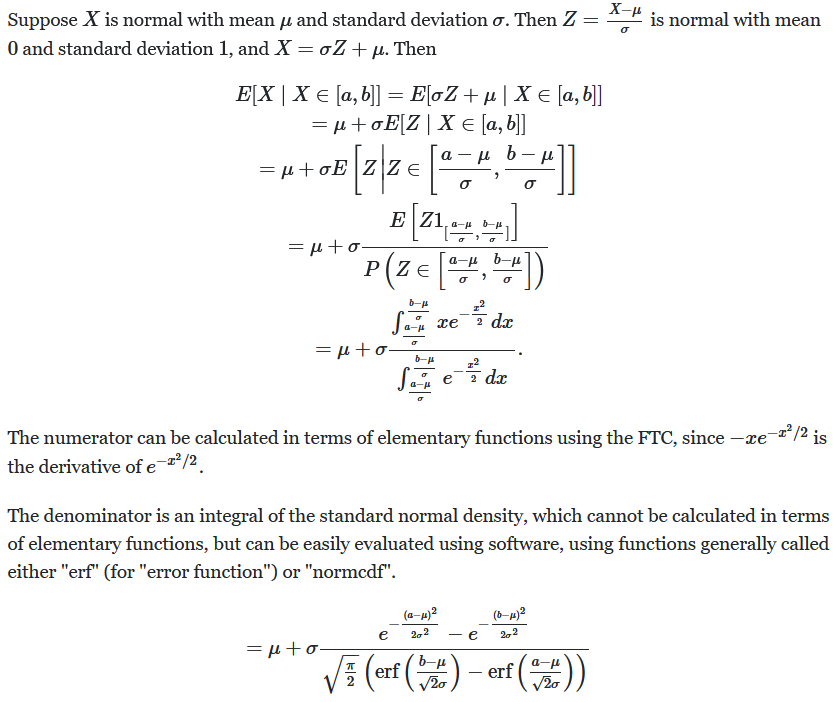

In [1]:
from scipy.integrate import quad

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math

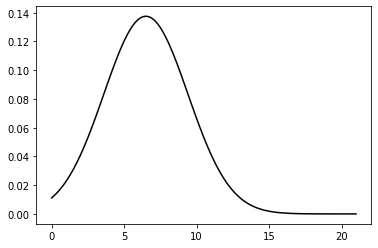

In [2]:
# Normal Distribution

x_min = 0.0
x_max = 21.0

mean = 6.5
std = 2.9

n = 102

x = np.linspace(x_min, x_max, 118)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

In [3]:
# integration between 6 and 21 to get prevalence

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,mean,std)
    return value

x1 = 6
x2 = 21

res, err = quad(normal_distribution_function, x1, x2)

subgroup_n = res*n

prev_ci = 1.96*math.sqrt((res*(1-res))/(subgroup_n))

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),round(res,4))
print('The n of the subgroup is: ', round(subgroup_n))

Normal Distribution (mean,std): 6.5 2.9
Integration bewteen 6 and 21 -->  0.5684
The n of the subgroup is:  58


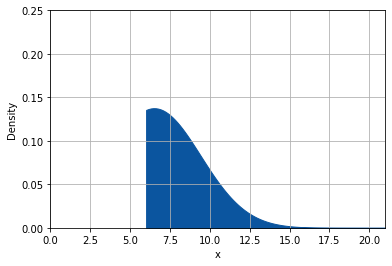

In [4]:
# plot distribution 

ptx = np.linspace(x1, x2, 100)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.xlabel('x')
plt.ylabel('Density')

plt.show()

In [5]:
# calculate mean and 95% CI of subgroup
def subgroup_stats(mean,std,x1,x2,subgroup_n):
  # x1 is the low end of the range (6 in our case)
  # x2 is the upper end of the range (21 in our case)
  # mean and std are the mean and standard deviation of the total cohort
  # subgroup_n is the sample size of the sleep disturbance subgroup 
  # (estimated by total sample size x prevalence estimate)
  subgroup_mean = mean + std*((math.exp(-(((x1-mean)**2)/(2*std**2)))) - math.exp(-(((x2-mean)**2)/(2*std**2))))/((math.sqrt(math.pi/2)*(math.erf((x2-mean)/(math.sqrt(2)*std))-math.erf((x1-mean)/(math.sqrt(2)*std)))))
  print('The mean of the sleep disturbance subgroup is: ', round(subgroup_mean,2))

  ci = 1.96*std/math.sqrt(n)
  print('The 95% CI is: ',round(subgroup_mean-ci,2),',',round(subgroup_mean+ci,2))

subgroup_stats(mean,std,x1,x2,subgroup_n)


The mean of the sleep disturbance subgroup is:  8.51
The 95% CI is:  7.94 , 9.07


In [6]:
# Prevalence with 95% CI
print('the prevalence of sleep disturbance is: ',round(res,2))
print('The 95% CI is: ',round(res-prev_ci,2), ',', round(res+prev_ci,2))

the prevalence of sleep disturbance is:  0.57
The 95% CI is:  0.44 , 0.7
